In [1]:
%matplotlib inline

In [2]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\Pragyaditya Das\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [39]:
iris = pd.read_csv('F:/Work/Python/Datasets/iris.csv')


In [40]:
iris.shape

(150, 6)

In [41]:
iris = iris[:100]

In [42]:
iris.shape
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
iris.Species = iris.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value=[0, 1])

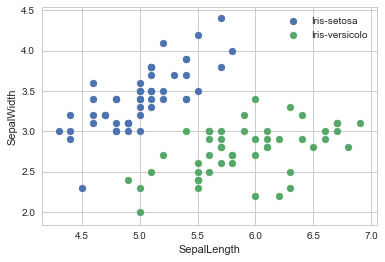

In [45]:
plt.scatter(iris[:50].SepalLengthCm, iris[:50].SepalWidthCm, label='Iris-setosa')
plt.scatter(iris[51:].SepalLengthCm, iris[51:].SepalWidthCm, label='Iris-versicolo')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(loc='best')

In [46]:
X = iris.drop(labels=['Id', 'Species'], axis=1).values
y = iris.Species.values

In [47]:
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

In [48]:
train_index = np.random.choice(len(X), round(len(X) * 0.8), replace=False)

In [49]:
test_index = np.array(list(set(range(len(X))) - set(train_index)))
train_X = X[train_index]
train_y = y[train_index]
test_X = X[test_index]
test_y = y[test_index]

In [50]:
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

In [51]:
# Normalized processing, must be placed after the data set segmentation, 
# otherwise the test set will be affected by the training set
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)

In [52]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, A's dimension is (4, 1)
A = tf.Variable(tf.random_normal(shape=[4, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [53]:
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [54]:
# Declare the model you need to learn
mod = tf.matmul(data, A) + b

In [55]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [56]:
# Define the learning rate， batch_size etc.
learning_rate = 0.003
batch_size = 30
iter_num = 1500


In [57]:
# Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)


In [58]:
# Define the goal
goal = opt.minimize(loss)

In [59]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [60]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

In [61]:
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

epoch:  300 loss: 0.646475 train_acc: 0.462500 test_acc: 0.650000
epoch:  600 loss: 0.545493 train_acc: 0.462500 test_acc: 0.650000
epoch:  900 loss: 0.446472 train_acc: 0.775000 test_acc: 0.950000
epoch: 1200 loss: 0.477945 train_acc: 0.975000 test_acc: 1.000000
epoch: 1500 loss: 0.406994 train_acc: 1.000000 test_acc: 1.000000


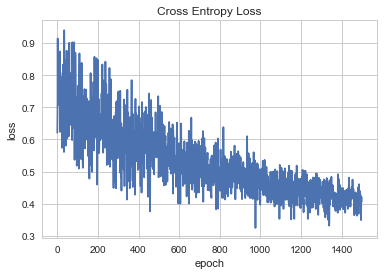

In [62]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

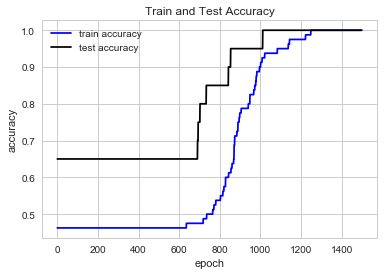

In [63]:
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()